<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from tensorflow.keras.utils import plot_model

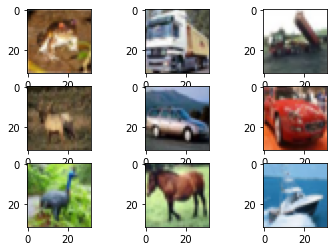

[[6]
 [9]
 [9]
 [4]
 [1]]
10
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)


In [31]:
# Load and plot ad hoc CIFAR10 instances
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(xtrain[i])

# show the plot
plt.show()

# normalize inputs from 0-255 to 0.0-1.0
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.

# one hot encode outputs
print(ytrain[0:5])
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

num_classes = ytest.shape[1]
print(num_classes)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)             

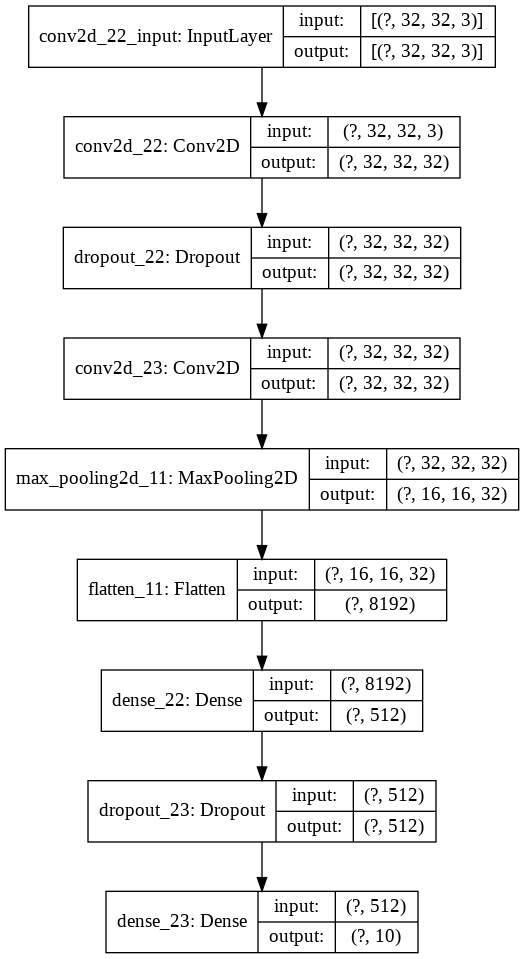

In [33]:
# Simple CNN model for CIFAR-10
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same', kernel_constraint=maxnorm(3.)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu' , padding='same', kernel_constraint=maxnorm(3.)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss= 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='CIFAR10_CNN.png', show_shapes=True, show_layer_names=True)

In [35]:
# Fit the model
seed = 7
np.random.seed(seed)

history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=32, verbose=2)

# Final evaluation of the model
scores = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
1563/1563 - 202s - loss: 1.8998 - accuracy: 0.3183 - val_loss: 1.7096 - val_accuracy: 0.4025
Epoch 2/20
1563/1563 - 206s - loss: 1.6431 - accuracy: 0.4150 - val_loss: 1.5070 - val_accuracy: 0.4706
Epoch 3/20
1563/1563 - 203s - loss: 1.5018 - accuracy: 0.4631 - val_loss: 1.4071 - val_accuracy: 0.5144
Epoch 4/20
1563/1563 - 204s - loss: 1.4053 - accuracy: 0.5006 - val_loss: 1.3174 - val_accuracy: 0.5355
Epoch 5/20
1563/1563 - 206s - loss: 1.3267 - accuracy: 0.5270 - val_loss: 1.2838 - val_accuracy: 0.5408
Epoch 6/20
1563/1563 - 202s - loss: 1.2572 - accuracy: 0.5525 - val_loss: 1.2097 - val_accuracy: 0.5671
Epoch 7/20
1563/1563 - 203s - loss: 1.1937 - accuracy: 0.5771 - val_loss: 1.1576 - val_accuracy: 0.5932
Epoch 8/20
1563/1563 - 206s - loss: 1.1388 - accuracy: 0.5976 - val_loss: 1.1192 - val_accuracy: 0.6028
Epoch 9/20
1563/1563 - 202s - loss: 1.0930 - accuracy: 0.6134 - val_loss: 1.1056 - val_accuracy: 0.6125
Epoch 10/20
1563/1563 - 203s - loss: 1.0438 - accuracy: 0.6327 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
1.0862616509199143
Training and validation loss    :  1.0862616509199143 1.1299279063940049
Training and validation accuracy:  0.6145099997520447 0.6028950050473213
313/313 [==============================] - 9s 28ms/step - loss: 0.9126 - accuracy: 0.6841
accuracy : [0.9125741124153137, 0.6840999722480774]


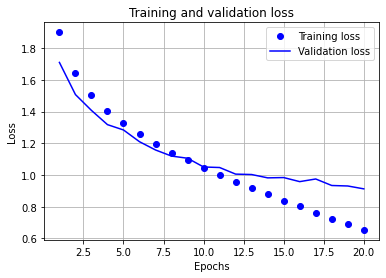

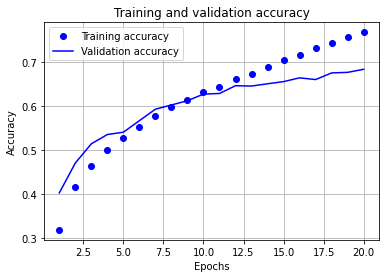

In [37]:
print(history.history.keys())
loss = history.history['loss']
print(np.mean(loss))
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

y_pred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()